In [1]:
import os
import sys
import inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import dirs, readFile
from wordEmbedders import WESCScore, WESClassifier
import pickle
import chevron
from re import sub

In [2]:
datasets = dirs('../data')
canonicalNames = {}
for dataset in datasets:
    name = readFile(f'../data/{dataset}/CanonicalName.txt')
    canonicalNames[dataset] = name

AirlineTweets2
0.6258187116462933
[0.6258187116462933, 0.57499793355133, 0.5406693643423319, 0.5295030959873767, 0.5327225034390584]
IMDB
0.62762
[0.62762, 0.6180755262008665, 0.6235495920524747, 0.6130227006640385, 0.6031807739724142]


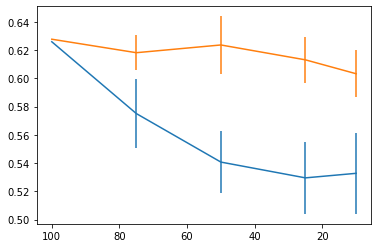

In [3]:
fig, ax = plt.subplots()
sizes = [100, 75, 50, 25, 10]

for dataset in datasets:
    means = []
    errors = []
    for size in sizes:
        if size == 100:
            result = WESCScore.load(f'../data/{dataset}/Word2Vec-Prediction.csv')
            print(dataset)
            print(result.balancedAccuracy)
            means.append(result.balancedAccuracy)
            errors.append(float('NaN'))
        else:
            dataFile = f'../corpusSize/data/{dataset}/Prediction-{size}.txt'
            results = [float(x) for x in readFile(dataFile).split(',')]
            means.append(np.mean(results))
            errors.append(np.std(results))

    label = f'{canonicalNames[dataset]}'

    #ax.plot(sizes, means, label=label)
    
    print(means)
    
    ax.errorbar(sizes, means, yerr=errors, label=label)
ax.invert_xaxis()

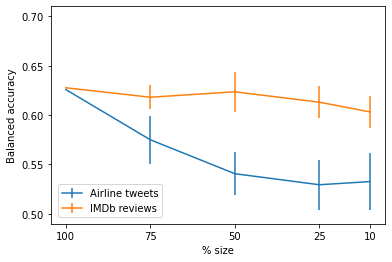

In [4]:

ax.set_xlabel('% size')
ax.set_ylabel('Balanced accuracy')
ax.set_xticks(sizes)
ax.set_yticks([0.5, 0.55, 0.6, 0.65, 0.7])
ax.set_ybound(0.49, 0.71)
fig.patch.set_alpha(1)
fig.legend(loc='lower left', bbox_to_anchor=(0.13, 0.13))
fig.savefig('./Results-Corpus-Size.png')
fig